In [0]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [0]:
# If you haven't mounted your drive yet, do so by running this code.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Set the current working directory
cwd = 'drive/My Drive/data mining project/preprocessing/'
home_cwd = 'drive/My Drive/data mining project/'

# Import Dataset

In [0]:
data = pd.read_csv(cwd+'bulk_quarterly_financials.csv')
data.head()

,symbol,qfs_symbol,name,company_type,currency,industry,period_type,period_end_date,revenue,cogs,gross_profit,sga,rnd,special_charges,other_opex,total_opex,operating_income,net_interest_income_normal,other_nonoperating_income,pretax_income,income_tax,net_income_continuing,net_income_discontinued,income_allocated_to_minority_interest,other_income_statement_items,net_income,preferred_dividends,net_income_available_to_shareholders,eps_basic,eps_diluted,shares_basic,shares_diluted,premiums_earned,net_investment_income,fees_and_other_income,net_policyholder_claims_expense,policy_acquisition_expense,interest_expense_insurance,total_interest_income,total_interest_expense,...,total_assets_growth,total_equity_growth,cfo_growth,capex_growth,fcf_growth,shares_eop,dividends,policy_revenue,underwriting_profit,roi,underwriting_margin,premiums_per_share,premiums_growth,policy_revenue_growth,total_investments_growth,earning_assets,net_interest_margin,earning_assets_to_equity,loans_to_deposits,loan_loss_reserve_to_loans,net_interest_income_growth,loans_gross_growth,loans_net_growth,deposits_growth,earning_assets_growth,market_cap,price_to_earnings,price_to_book,price_to_sales,price_to_tangible_book,price_to_fcf,period_end_stock_price,enterprise_value,price_to_pretax_income,enterprise_value_to_earnings,enterprise_value_to_book,enterprise_value_to_tangible_book,enterprise_value_to_sales,enterprise_value_to_fcf,enterprise_value_to_pretax_income
0,MBI,MBI:US,MBIA Inc,insurance,USD,Insurance Brokerage & Other,FQ,2003-12,8.225800e+07,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2.769190e+08,NaN,NaN,2.769190e+08,-79605000.0,1.953690e+08,0.0,0.0,NaN,1.934350e+08,0.0,1.934350e+08,1.35,1.33,143491000.0,144982000.0,226791000.0,5.177630e+08,-6.622960e+08,-345975000.0,15152000.0,136162000.0,NaN,NaN,...,0.612098,0.145465,NaN,NaN,NaN,144070000.0,0.2,-4.355050e+08,-1.046820e+08,0.145234,0.240369,1.564270,0.215431,-0.132800,0.107060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.533266e+09,10.343353,1.387523,5.801758,1.405672,NaN,NaN,9.555061e+09,NaN,11.581892,1.553668,1.573991,6.496475,NaN,NaN
1,MBI,MBI:US,MBIA Inc,insurance,USD,Insurance Brokerage & Other,FQ,2013-06,7.300000e+07,NaN,NaN,105000000.0,NaN,NaN,NaN,NaN,-2.640000e+08,NaN,NaN,-2.640000e+08,86000000.0,-1.780000e+08,0.0,0.0,NaN,-1.780000e+08,0.0,-1.780000e+08,-0.94,-0.94,189164000.0,189164000.0,124000000.0,1.402000e+09,-1.453000e+09,149000000.0,11000000.0,72000000.0,NaN,NaN,...,-0.187172,0.202772,NaN,NaN,NaN,195670000.0,0.0,-1.329000e+09,-1.489000e+09,0.161668,1.120391,0.655516,-0.274854,-3.850365,-0.060564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.604368e+09,4.140489,0.857546,2.026745,0.857546,NaN,NaN,6.695368e+09,NaN,10.644464,2.204599,2.204599,5.210403,NaN,NaN
2,MBI,MBI:US,MBIA Inc,insurance,USD,Insurance Brokerage & Other,FQ,2011-09,1.120000e+09,NaN,NaN,83000000.0,NaN,NaN,NaN,NaN,7.450000e+08,NaN,NaN,7.450000e+08,-301000000.0,4.440000e+08,0.0,0.0,NaN,4.440000e+08,0.0,4.440000e+08,2.27,2.26,195613000.0,196348000.0,176000000.0,1.090000e+08,8.350000e+08,190000000.0,12000000.0,90000000.0,NaN,NaN,...,-0.117282,-0.059155,NaN,NaN,NaN,199780000.0,0.0,1.011000e+09,8.090000e+08,-0.008581,0.800198,0.896368,0.284672,3.905172,-0.179303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.452401e+09,-6.001655,0.611537,3.338852,0.619625,NaN,NaN,1.556140e+10,NaN,-64.303308,6.552169,6.638823,35.773335,NaN,NaN
3,MBI,MBI:US,MBIA Inc,insurance,USD,Insurance Brokerage & Other,FQ,2014-09,2.910000e+08,NaN,NaN,48000000.0,NaN,NaN,NaN,NaN,1.480000e+08,NaN,NaN,1.480000e+08,25000000.0,1.730000e+08,0.0,0.0,NaN,1.730000e+08,0.0,1.730000e+08,0.90,0.80,187105000.0,188424000.0,116000000.0,1.040000e+08,7.100000e+07,20000000.0,13000000.0,62000000.0,NaN,NaN,...,-0.081211,0.218994,NaN,NaN,NaN,195210000.0,0.0,1.870000e+08,1.540000e+08,0.135523,0.823529,0.615633,0.115385,1.527027,-0.244444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.792028e+09,2.631465,0.459259,1.199483,0.459259,NaN,NaN,1.064603e+10,NaN,15.632934,2.728352,2.728352,7.125855,NaN,NaN
4,MBI,MBI:US,MBIA Inc,

# Feature Engineering



## Split off only companies in the Russell 1000

In [0]:
russell_df = pd.read_csv(cwd+'Russell-1000-Stock-Tickers-List.csv', header=0)

In [0]:
russell_df.head()
tickers = russell_df['Ticker']
tickers.head()

0       A
1      AA
2     AAL
3     AAP
4    AAPL
Name: Ticker, dtype: object

In [0]:
proper_df = data[data['symbol'].isin(tickers)]
proper_df.reset_index(inplace=True, drop=True)
proper_df.head(1000)

,symbol,qfs_symbol,name,company_type,currency,industry,period_type,period_end_date,revenue,cogs,gross_profit,sga,rnd,special_charges,other_opex,total_opex,operating_income,net_interest_income_normal,other_nonoperating_income,pretax_income,income_tax,net_income_continuing,net_income_discontinued,income_allocated_to_minority_interest,other_income_statement_items,net_income,preferred_dividends,net_income_available_to_shareholders,eps_basic,eps_diluted,shares_basic,shares_diluted,premiums_earned,net_investment_income,fees_and_other_income,net_policyholder_claims_expense,policy_acquisition_expense,interest_expense_insurance,total_interest_income,total_interest_expense,...,total_assets_growth,total_equity_growth,cfo_growth,capex_growth,fcf_growth,shares_eop,dividends,policy_revenue,underwriting_profit,roi,underwriting_margin,premiums_per_share,premiums_growth,policy_revenue_growth,total_investments_growth,earning_assets,net_interest_margin,earning_assets_to_equity,loans_to_deposits,loan_loss_reserve_to_loans,net_interest_income_growth,loans_gross_growth,loans_net_growth,deposits_growth,earning_assets_growth,market_cap,price_to_earnings,price_to_book,price_to_sales,price_to_tangible_book,price_to_fcf,period_end_stock_price,enterprise_value,price_to_pretax_income,enterprise_value_to_earnings,enterprise_value_to_book,enterprise_value_to_tangible_book,enterprise_value_to_sales,enterprise_value_to_fcf,enterprise_value_to_pretax_income
0,MCD,MCD:US,McDonald's Corp,normal,USD,Accomodation & Food Services,FQ,2003-12,4.555400e+09,-2.520000e+08,4.807400e+09,3.925300e+09,0.0,0.0,5.146000e+08,4.439900e+09,3.675000e+08,0.0,-100000000.0,2.675000e+08,-141800000.0,1.257000e+08,0.0,0.0,0.0,1.257000e+08,0.0,1.257000e+08,0.100000,0.100000,1.265600e+09,1.277400e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.077908,0.165452,0.457751,0.294612,1.429356,1.269160e+09,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.151324e+10,21.417183,2.630071,1.838525,3.054556,19.874649,NaN,4.134854e+10,13.430465,28.101497,3.450917,4.007884,2.412330,26.077537,17.622120
1,MCD,MCD:US,McDonald's Corp,normal,USD,Accomodation & Food Services,FQ,2013-06,7.083800e+09,4.318600e+09,2.765200e+09,6.070000e+08,0.0,-5600000.0,0.000000e+00,6.014000e+08,2.163800e+09,-126700000.0,22800000.0,2.059900e+09,-663400000.0,1.396500e+09,0.0,0.0,0.0,1.396500e+09,0.0,1.396500e+09,1.390000,1.380000,1.001400e+09,1.008700e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.033631,0.080911,0.018003,0.158146,0.180651,9.950300e+08,0.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.850797e+10,17.852762,6.493304,3.544268,7.949256,24.240359,NaN,1.141562e+11,12.164031,20.688711,7.524779,9.212012,4.107283,28.090991,14.096313
2,MCD,MCD:US,McDonald's Corp,normal,USD,Accomodation & Food Services,FQ,2011-09,7.166300e+09,4.259500e+09,2.906800e+09,5.809000e+08,0.0,-6500000.0,0.000000e+00,5.744000e+08,2.332400e+09,-113700000.0,44500000.0,2.263200e+09,-755900000.0,1.507300e+09,0.0,0.0,0.0,1.507300e+09,0.0,1.507300e+09,1.470000,1.450000,1.028800e+09,1.041300e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.035581,-0.021968,0.115820,-0.323456,0.039401,1.016150e+09,0.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.923829e+10,16.621646,6.690430,3.380571,8.340183,19.902380,NaN,1.026152e+11,11.496669,19.113246,7.693331,9.590384,3.887322,22.885765,13.220030
3,MCD,MCD:US,McDonald's Corp,normal,USD,Accomodation & Food Services,FQ,2014-09,6.987100e+09,4.305900e+09,2.681200e+09,5.758000e+08,0.0,-4900000.0,-4.547474e-07,5.709000e+08,2.110300e+09,-143800000.0,-45400000.0,1.921100e+09,-852700000.0,1.068400e+09,0.0,0.0,0.0,1.068400e+09,0.0,1.068400e+09,1.090000,1.090000,9.787000e+08,9.838000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.013206,-0.101484,-0.106120,0.041042,-0.138917,9.819300e+08,0.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.309678e+10,18.408396,6.832340,3.329368,8.608356,21.257885,NaN,1.104395e+11,11.888085,21.837637,8.105

Save into file

In [0]:
proper_df.to_csv(cwd+'russell-1000-quarterly-financials.csv', index=False)

## Cut Columns

In [0]:
proper_df = pd.read_csv(cwd+'russell-1000-quarterly-financials.csv')
proper_df['roic']

0        0.070692
1        0.210527
2        0.220738
3        0.187846
4        0.209722
           ...   
65075         NaN
65076         NaN
65077         NaN
65078         NaN
65079         NaN
Name: roic, Length: 65080, dtype: float64

In [0]:
features = pd.read_csv(cwd+'possible_features.csv',header=None) # created possible_features.csv by hand
features = features[0]

features.head

<bound method NDFrame.head of 0                         roa
1                         roe
2                gross_margin
3               ebitda_margin
4            operating_margin
5               pretax_margin
6           net_income_margin
7                  fcf_margin
8            assets_to_equity
9              debt_to_equity
10             debt_to_assets
11             revenue_growth
12        gross_profit_growth
13              ebitda_growth
14    operating_income_growth
15       pretax_income_growth
16          net_income_growth
17      cash_and_equiv_growth
18                 ppe_growth
19        total_assets_growth
20        total_equity_growth
21                 cfo_growth
22               capex_growth
23                 fcf_growth
Name: 0, dtype: object>

In [0]:
'''proper_df[proper_df['total_assets'] == 0]['total_assets']
proper_df = proper_df.drop(proper_df[proper_df['total_assets'] == 0].index)
proper_df[proper_df['total_assets'] == 0]['total_assets']
proper_df = proper_df.drop(proper_df[proper_df['total_equity'] == 0].index)
proper_df = proper_df.drop(proper_df[proper_df['revenue'] == 0].index)'''

#pd.isnull(proper_df['total_liabilities']).sum()

0

In [0]:
# roa = net_income/total_assets
proper_df['roa'] = proper_df.apply(lambda row: row['net_income']/row['total_assets'], axis=1)
# roe = net_income/total_equity
proper_df['roe'] = proper_df.apply(lambda row: row['net_income']/row['total_equity'], axis=1)

# gross_margin = gross_profit/revenue
proper_df['gross_margin'] = proper_df.apply(lambda row: row['gross_profit']/row['revenue'], axis=1)

# ebitda_margin = ebitda/revenue
proper_df['ebitda_margin'] = proper_df.apply(lambda row: row['ebitda']/row['revenue'], axis=1)

# operating_margin = operating_income/revenue
proper_df['operating_margin'] = proper_df.apply(lambda row: row['operating_income']/row['revenue'], axis=1)

# pretax_margin = pretax_income/revenue
proper_df['pretax_margin'] = proper_df.apply(lambda row: row['pretax_income']/row['revenue'], axis=1)

# net_income_margin = net_income/revenue
proper_df['net_income_margin'] = proper_df.apply(lambda row: row['net_income']/row['revenue'], axis=1)

# fcf_margin = fcf/revenue
proper_df['fcf_margin'] = proper_df.apply(lambda row: row['fcf']/row['revenue'], axis=1)

# assets_to_equity = total_assets/total_equity
proper_df['assets_to_equity'] = proper_df.apply(lambda row: row['total_assets']/row['total_equity'], axis=1)

# debt_to_equity = total_liabilities/total_equity
proper_df['debt_to_equity'] = proper_df.apply(lambda row: row['total_liabilities']/row['total_equity'], axis=1)

# debt_to_assets = total_liabilities/total_assets
proper_df['debt_to_assets'] = proper_df.apply(lambda row: row['total_liabilities']/row['total_assets'], axis=1)

print(proper_df[proper_df['symbol']=='WMT'].iloc[0].to_string())

Unnamed: 0                                                                       57626
symbol                                                                             WMT
qfs_symbol                                                                      WMT:US
name                                                                       Walmart Inc
company_type                                                                    normal
currency                                                                           USD
industry                                             Supermarkets & Convenience Stores
period_type                                                                         FQ
period_end_date                                                                2003-10
revenue                                                                     6.3035e+10
cogs                                                                        4.8292e+10
gross_profit                               

In [0]:
# sort them by period
proper_df.sort_values(by=['symbol', 'period_end_date'], inplace=True)
proper_df.reset_index(inplace=True, drop=True)
#proper_df = proper_df.drop(columns=['Unnamed: 0'], axis=1)

proper_df.head(2)

,symbol,qfs_symbol,name,company_type,currency,industry,period_type,period_end_date,revenue,cogs,gross_profit,sga,rnd,special_charges,other_opex,total_opex,operating_income,net_interest_income_normal,other_nonoperating_income,pretax_income,income_tax,net_income_continuing,net_income_discontinued,income_allocated_to_minority_interest,other_income_statement_items,net_income,preferred_dividends,net_income_available_to_shareholders,eps_basic,eps_diluted,shares_basic,shares_diluted,premiums_earned,net_investment_income,fees_and_other_income,net_policyholder_claims_expense,policy_acquisition_expense,interest_expense_insurance,total_interest_income,total_interest_expense,...,total_assets_growth,total_equity_growth,cfo_growth,capex_growth,fcf_growth,shares_eop,dividends,policy_revenue,underwriting_profit,roi,underwriting_margin,premiums_per_share,premiums_growth,policy_revenue_growth,total_investments_growth,earning_assets,net_interest_margin,earning_assets_to_equity,loans_to_deposits,loan_loss_reserve_to_loans,net_interest_income_growth,loans_gross_growth,loans_net_growth,deposits_growth,earning_assets_growth,market_cap,price_to_earnings,price_to_book,price_to_sales,price_to_tangible_book,price_to_fcf,period_end_stock_price,enterprise_value,price_to_pretax_income,enterprise_value_to_earnings,enterprise_value_to_book,enterprise_value_to_tangible_book,enterprise_value_to_sales,enterprise_value_to_fcf,enterprise_value_to_pretax_income
0,A,A:US,Agilent Technologies Inc,normal,USD,"Professional, Scientific, & Technical Services",FQ,2000-01,2.246000e+09,1.160000e+09,1.086000e+09,625000000.0,290000000.0,0.0,0.0,915000000.0,171000000.0,0.0,31000000.0,202000000.0,-71000000.0,131000000.0,0.0,0.0,0.0,131000000.0,0.0,131000000.0,0.30,0.297727,439000000.0,440000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,452000000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.015920e+10,35.429174,4.493803,2.765322,4.493803,68.80273,NaN,2.208120e+10,46.449770,38.807030,4.922247,4.922247,3.028971,75.362457,50.878341
1,A,A:US,Agilent Technologies Inc,normal,USD,"Professional, Scientific, & Technical Services",FQ,2000-04,2.142000e+09,1.069000e+09,1.073000e+09,626000000.0,263000000.0,0.0,0.0,889000000.0,184000000.0,0.0,28000000.0,212000000.0,-72000000.0,140000000.0,26000000.0,0.0,0.0,166000000.0,0.0,166000000.0,0.37,0.370000,452000000.0,457000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,452000000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.698892e+10,46.693633,5.814072,3.636341,5.814072,262.02835,NaN,2.796692e+10,55.192065,48.385675,6.024757,6.024757,3.768111,271.523495,57.192065


In [0]:
# add past quarter's data to column
proper_df[['p_revenue', 'p_gross_profit', 'p_ebitda', 'p_operating_income', 'p_pretax_income', 'p_net_income', 'p_cash_and_equiv', 'p_ppe_net', 'p_total_assets', 'p_total_equity', 'p_cf_cfo', 'p_capex', 'p_fcf', 'dummy']] = \
proper_df[['revenue', 'gross_profit', 'ebitda', 'operating_income', 'pretax_income', 'net_income', 'cash_and_equiv', 'ppe_net', 'total_assets', 'total_equity', 'cf_cfo', 'capex', 'fcf', 'symbol']].shift(periods=1)

proper_df.head()

In [0]:
# drop invalid rows
proper_df = proper_df.drop(proper_df[proper_df['symbol'] != proper_df['dummy']].index)
proper_df.head(80)

In [0]:
# drop 0 rows
proper_df = proper_df.drop(proper_df[proper_df['p_ebitda'] == 0].index)
proper_df = proper_df.drop(proper_df[proper_df['p_operating_income'] == 0].index)
proper_df = proper_df.drop(proper_df[proper_df['p_pretax_income'] == 0].index)
proper_df = proper_df.drop(proper_df[proper_df['p_net_income'] == 0].index)
proper_df = proper_df.drop(proper_df[proper_df['p_cash_and_equiv'] == 0].index)
proper_df = proper_df.drop(proper_df[proper_df['p_ppe_net'] == 0].index)
proper_df = proper_df.drop(proper_df[proper_df['p_total_assets'] == 0].index)
proper_df = proper_df.drop(proper_df[proper_df['p_total_equity'] == 0].index)
proper_df = proper_df.drop(proper_df[proper_df['p_cf_cfo'] == 0].index)
proper_df = proper_df.drop(proper_df[proper_df['p_capex'] == 0].index)
proper_df = proper_df.drop(proper_df[proper_df['p_fcf'] == 0].index)

In [0]:
# growth = new-old/old


# revenue_growth
proper_df['revenue_growth'] = proper_df.apply(lambda row: (row['revenue']-row['p_revenue'])/row['p_revenue'], axis=1)

# gross_profit_growth
proper_df['gross_profit_growth'] = proper_df.apply(lambda row: (row['gross_profit']-row['p_gross_profit'])/row['p_gross_profit'], axis=1)

# ebitda_growth
proper_df['ebitda_growth'] = proper_df.apply(lambda row: (row['ebitda']-row['p_ebitda'])/row['p_ebitda'], axis=1)

# operating_income_growth
proper_df['operating_income_growth'] = proper_df.apply(lambda row: (row['operating_income']-row['p_operating_income'])/row['p_operating_income'], axis=1)

# pretax_income_growth
proper_df['pretax_income_growth'] = proper_df.apply(lambda row: (row['pretax_income']-row['p_pretax_income'])/row['p_pretax_income'], axis=1)

# net_income_growth
proper_df['net_income_growth'] = proper_df.apply(lambda row: (row['net_income']-row['p_net_income'])/row['p_net_income'], axis=1)

# cash_and_equiv_growth
proper_df['cash_and_equiv_growth'] = proper_df.apply(lambda row: (row['cash_and_equiv']-row['p_cash_and_equiv'])/row['p_cash_and_equiv'], axis=1)

# ppe_growth
proper_df['ppe_growth'] = proper_df.apply(lambda row: (row['ppe_net']-row['p_ppe_net'])/row['p_ppe_net'], axis=1)

# total_assets_growth
proper_df['total_assets_growth'] = proper_df.apply(lambda row: (row['total_assets']-row['p_total_assets'])/row['p_total_assets'], axis=1)

# total_equity_growth
proper_df['total_equity_growth'] = proper_df.apply(lambda row: (row['total_equity']-row['p_total_equity'])/row['p_total_equity'], axis=1)

# cfo_growth
proper_df['cfo_growth'] = proper_df.apply(lambda row: (row['cf_cfo']-row['p_cf_cfo'])/row['p_cf_cfo'], axis=1)

# capex_growth
proper_df['capex_growth'] = proper_df.apply(lambda row: (row['capex']-row['p_capex'])/row['p_capex'], axis=1)

# fcf_growth
proper_df['fcf_growth'] = proper_df.apply(lambda row: (row['fcf']-row['p_fcf'])/row['p_fcf'], axis=1)

proper_df.head(80)

,symbol,qfs_symbol,name,company_type,currency,industry,period_type,period_end_date,revenue,cogs,gross_profit,sga,rnd,special_charges,other_opex,total_opex,operating_income,net_interest_income_normal,other_nonoperating_income,pretax_income,income_tax,net_income_continuing,net_income_discontinued,income_allocated_to_minority_interest,other_income_statement_items,net_income,preferred_dividends,net_income_available_to_shareholders,eps_basic,eps_diluted,shares_basic,shares_diluted,premiums_earned,net_investment_income,fees_and_other_income,net_policyholder_claims_expense,policy_acquisition_expense,interest_expense_insurance,total_interest_income,total_interest_expense,...,total_investments_growth,earning_assets,net_interest_margin,earning_assets_to_equity,loans_to_deposits,loan_loss_reserve_to_loans,net_interest_income_growth,loans_gross_growth,loans_net_growth,deposits_growth,earning_assets_growth,market_cap,price_to_earnings,price_to_book,price_to_sales,price_to_tangible_book,price_to_fcf,period_end_stock_price,enterprise_value,price_to_pretax_income,enterprise_value_to_earnings,enterprise_value_to_book,enterprise_value_to_tangible_book,enterprise_value_to_sales,enterprise_value_to_fcf,enterprise_value_to_pretax_income,p_revenue,p_gross_profit,p_ebitda,p_operating_income,p_pretax_income,p_net_income,p_cash_and_equiv,p_ppe_net,p_total_assets,p_total_equity,p_cf_cfo,p_capex,p_fcf,dummy
1,A,A:US,Agilent Technologies Inc,normal,USD,"Professional, Scientific, & Technical Services",FQ,2000-04,2.142000e+09,1.069000e+09,1.073000e+09,626000000.0,263000000.0,0.0,0.0,8.890000e+08,184000000.0,0.0,28000000.0,212000000.0,-72000000.0,140000000.0,26000000.0,0.0,0.0,166000000.0,0.0,166000000.0,0.370000,0.370000,452000000.0,457000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.698892e+10,46.693633,5.814072,3.636341,5.814072,262.028350,NaN,2.796692e+10,55.192065,48.385675,6.024757,6.024757,3.768111,271.523495,57.192065,2.246000e+09,1.086000e+09,267000000.0,171000000.0,202000000.0,131000000.0,1.368000e+09,1.408000e+09,7.107000e+09,4.486000e+09,384000000.0,-91000000.0,293000000.0,A
2,A,A:US,Agilent Technologies Inc,normal,USD,"Professional, Scientific, & Technical Services",FQ,2000-07,2.351000e+09,1.189000e+09,1.162000e+09,685000000.0,288000000.0,0.0,0.0,9.730000e+08,189000000.0,0.0,27000000.0,216000000.0,-73000000.0,143000000.0,12000000.0,0.0,0.0,155000000.0,0.0,155000000.0,0.340000,0.340000,453000000.0,461000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.241192e+10,20.755719,2.532011,1.614874,2.532011,-142.665747,NaN,1.311492e+10,21.775298,21.931304,2.675422,2.675422,1.706339,-150.746207,23.008632,2.142000e+09,1.073000e+09,273000000.0,184000000.0,212000000.0,166000000.0,9.780000e+08,1.453000e+09,7.321000e+09,4.642000e+09,-55000000.0,-135000000.0,-190000000.0,A
3,A,A:US,Agilent Technologies Inc,normal,USD,"Professional, Scientific, & Technical Services",FQ,2000-10,3.017000e+09,1.373000e+09,1.644000e+09,942000000.0,255000000.0,0.0,0.0,1.197000e+09,447000000.0,0.0,9000000.0,456000000.0,-155000000.0,301000000.0,4000000.0,0.0,0.0,305000000.0,0.0,305000000.0,0.670000,0.650000,452000000.0,464000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.413391e+10,18.670954,2.684504,1.448740,2.945792,-706.695600,NaN,1.512991e+10,13.014652,19.986674,2.873677,3.153379,1.550831,-756.495600,13.931779,2.351000e+09,1.162000e+09,325000000.0,189000000.0,216000000.0,155000000.0,7.030000e+08,1.581000e+09,7.827000e+09,4.902000e+09,27000000.0,-217000000.0,-190000000.0,A
4,A,A:US,Agilent Technologies Inc,normal,USD,"Professional, Scientific, & Technical Services",FQ,2001-01,2.841000e+09,1.449000e+09,1.392000e+09,741000000.0,372000000.0,0.0,0.0,1.113000e+09,279000000.0,0.0,19000000.0,298000000.0,-119000000.0,179000000.0,0.0,0.0,-25000000.0,154000000.0,0.0,154000000.0,0.340000,0.330000,455000000.0,466000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Na

In [0]:
# verify growth ratios worked
print(proper_df.iloc[1].to_string())

In [0]:
# reduced_features_df is used only for the correlation matrix
reduced_features_df = proper_df[features]
reduced_features_df.head()
print(reduced_features_df.shape)

(55714, 24)


In [0]:
feature_corr = reduced_features_df.corr(method ='pearson') 

In [0]:
f = plt.figure(figsize=(25, 25))
plt.matshow(feature_corr, fignum=f.number)

plt.xticks(range(feature_corr.shape[1]), feature_corr.columns,  rotation=45)
plt.yticks(range(feature_corr.shape[1]), feature_corr.columns)
plt.show()

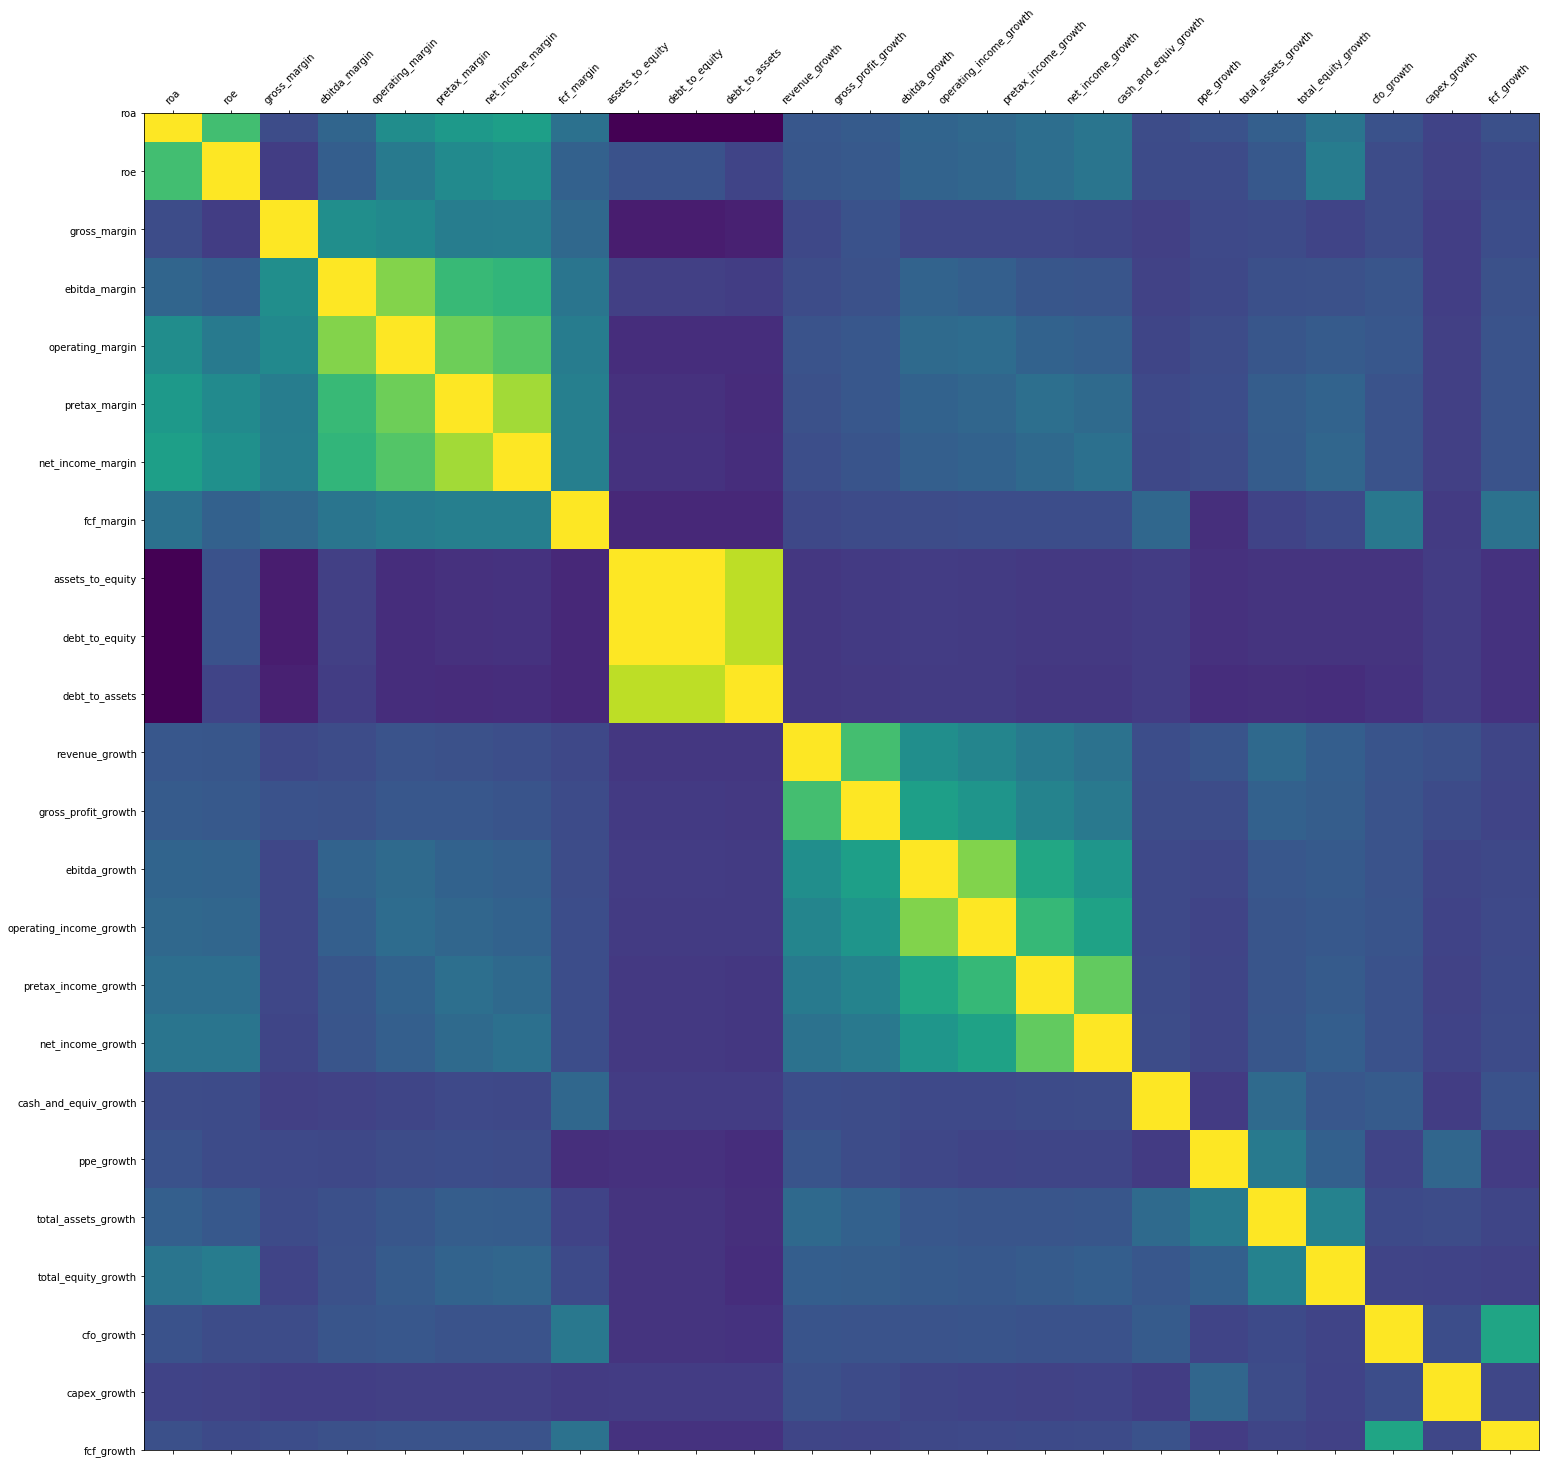

In [0]:
feature_corr2 = reduced_features_df.corr(method ='kendall') 
f = plt.figure(figsize=(25, 25))
plt.matshow(feature_corr2, fignum=f.number)

plt.xticks(range(feature_corr2.shape[1]), feature_corr2.columns,  rotation=45)
plt.yticks(range(feature_corr2.shape[1]), feature_corr2.columns)
plt.show()

We removed features which were extremely correlated with one another. We used our best judgement to decide which features to keep out of a correlated group

In [0]:
kept_features = pd.Series(data=['symbol','industry','net_income_growth','period_end_date','roa','gross_margin','net_income_margin','fcf_margin','debt_to_assets','revenue_growth','cash_and_equiv_growth','total_assets_growth','capex_growth','fcf_growth'])

In [0]:
feature_engineered_df = proper_df[kept_features]

In [0]:
feature_engineered_df.head(10)

In [0]:
feature_engineered_df.to_csv(cwd+'feature_cut-russell-1000-quarterly-financials.csv', index=False)

## Attach Future Income Label

In [0]:
# import necessary dataframes
feature_engineered_df = pd.read_csv(cwd+'feature_cut-russell-1000-quarterly-financials.csv')
feature_engineered_df.sort_values(by=['symbol', 'period_end_date'], inplace=True)
feature_engineered_df.reset_index(inplace=True, drop=True)


#feature_engineered_df.head(10)

In [0]:
# Set the label
feature_engineered_df[['label', 'dummy']] = feature_engineered_df[['net_income_growth','symbol']].shift(periods=-1)


feature_engineered_df.head()

,symbol,industry,net_income_growth,period_end_date,roa,gross_margin,net_income_margin,fcf_margin,debt_to_assets,revenue_growth,cash_and_equiv_growth,total_assets_growth,capex_growth,fcf_growth,label,dummy
0,A,"Professional, Scientific, & Technical Services",0.267176,2000-04,0.022674,0.500934,0.077498,-0.088702,0.365934,-0.046305,-0.285088,0.030111,0.483516,-1.648464,-0.066265,A
1,A,"Professional, Scientific, & Technical Services",-0.066265,2000-07,0.019803,0.494258,0.065929,-0.080817,0.373706,0.097572,-0.281186,0.069116,0.607407,-0.000000,0.967742,A
2,A,"Professional, Scientific, & Technical Services",0.967742,2000-10,0.036615,0.544912,0.101094,0.022207,0.367947,0.283284,0.416785,0.064265,0.658986,-1.352632,-0.495082,A
3,A,"Professional, Scientific, & Technical Services",-0.495082,2001-01,0.016725,0.489968,0.054206,-0.130236,0.398241,-0.058336,-0.565261,0.105402,-0.519444,-6.522388,-0.337662,A
4,A,"Professional, Scientific, & Technical Services",-0.337662,2001-04,0.011233,0.437656,0.042394,-0.061097,0.381498,-0.153115,0.868360,-0.013901,0.630058,-0.602703,-3.205882,A


In [0]:
# save removed rows into a separate dataframe
deleted_future_df = feature_engineered_df[feature_engineered_df['symbol'] != feature_engineered_df['dummy']]
deleted_future_df = deleted_future_df.drop(columns=['label', 'dummy'])
deleted_future_df.head()

deleted_future_df.to_csv(cwd+'removed_recent.csv', index=False)

In [0]:
# Chop off rows with no label
feature_engineered_df = feature_engineered_df.drop(feature_engineered_df[feature_engineered_df['symbol'] != feature_engineered_df['dummy']].index)

In [0]:
feature_engineered_df = feature_engineered_df.drop(columns=['dummy'])


In [0]:
feature_engineered_df.to_csv(cwd+'label_added-feature_cut-russell-1000-quarterly-financials.csv', index=False)

## Replace period_end_date with 4 binary variables corresponding to quarter

In [0]:
# import dataset
df = pd.read_csv(cwd+'label_added-feature_cut-russell-1000-quarterly-financials.csv')
df.head()

In [0]:
# create 4 columns
df['quarter1'] = 0
df['quarter2'] = 0
df['quarter3'] = 0
df['quarter4'] = 0
df.head()

In [0]:
def fix_quarter(index):
  month = int(df.iloc[index]['period_end_date'].split('-')[1])

  # quarter 1: 3,4,5
  if month > 2 and month < 6:
    df['quarter1'].iloc[index] = 1
  # quarter 2: 6,7,8
  elif month > 5 and month < 9:
    df['quarter2'].iloc[index] = 1
  # quarter 3: 9,10,11
  elif month > 8 and month < 12:
    df['quarter3'].iloc[index] = 1
  # quarter 4: 12,1,2
  elif month > 11 or month < 3:
    df['quarter4'].iloc[index] = 1

for index, row in df.iterrows():
  fix_quarter(index)


df.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,symbol,industry,net_income_growth,period_end_date,roa,gross_margin,net_income_margin,fcf_margin,debt_to_assets,revenue_growth,cash_and_equiv_growth,total_assets_growth,capex_growth,fcf_growth,label,quarter1,quarter2,quarter3,quarter4
0,A,"Professional, Scientific, & Technical Services",0.267176,2000-04,0.022674,0.500934,0.077498,-0.088702,0.365934,-0.046305,-0.285088,0.030111,0.483516,-1.648464,-0.066265,1,0,0,0
1,A,"Professional, Scientific, & Technical Services",-0.066265,2000-07,0.019803,0.494258,0.065929,-0.080817,0.373706,0.097572,-0.281186,0.069116,0.607407,-0.000000,0.967742,0,1,0,0
2,A,"Professional, Scientific, & Technical Services",0.967742,2000-10,0.036615,0.544912,0.101094,0.022207,0.367947,0.283284,0.416785,0.064265,0.658986,-1.352632,-0.495082,0,0,1,0
3,A,"Professional, Scientific, & Technical Services",-0.495082,2001-01,0.016725,0.489968,0.054206,-0.130236,0.398241,-0.058336,-0.565261,0.105402,-0.519444,-6.522388,-0.337662,0,0,0,1
4,A,"Professional, Scientific, & Technical Services",-0.337662,2001-04,0.011233,0.437656,0.042394,-0.061097,0.381498,-0.153115,0.868360,-0.013901,0.630058,-0.602703,-3.205882,1,0,0,0


In [0]:
df.to_csv(cwd+'final-r1000.csv', index=False)

In [0]:
def fix_quarter(index):
  month = int(removed_df.iloc[index]['period_end_date'].split('-')[1])

  # quarter 1: 3,4,5
  if month > 2 and month < 6:
    removed_df['quarter1'].iloc[index] = 1
  # quarter 2: 6,7,8
  elif month > 5 and month < 9:
    removed_df['quarter2'].iloc[index] = 1
  # quarter 3: 9,10,11
  elif month > 8 and month < 12:
    removed_df['quarter3'].iloc[index] = 1
  # quarter 4: 12,1,2
  elif month > 11 or month < 3:
    removed_df['quarter4'].iloc[index] = 1
# do same for removed_recent.csv
removed_df = pd.read_csv(cwd+'removed_recent.csv')
removed_df['quarter1'] = 0
removed_df['quarter2'] = 0
removed_df['quarter3'] = 0
removed_df['quarter4'] = 0

for index, row in removed_df.iterrows():
  fix_quarter(index)
removed_df.to_csv(cwd+'final-removed.csv', index=False)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


## Split by Industry

In [0]:
feature_engineered_df = pd.read_csv(cwd+'final-r1000.csv')
feature_engineered_df.head()

,symbol,industry,net_income_growth,period_end_date,roa,gross_margin,net_income_margin,fcf_margin,debt_to_assets,revenue_growth,cash_and_equiv_growth,total_assets_growth,capex_growth,fcf_growth,label,quarter1,quarter2,quarter3,quarter4
0,A,"Professional, Scientific, & Technical Services",0.267176,2000-04,0.022674,0.500934,0.077498,-0.088702,0.365934,-0.046305,-0.285088,0.030111,0.483516,-1.648464,-0.066265,1,0,0,0
1,A,"Professional, Scientific, & Technical Services",-0.066265,2000-07,0.019803,0.494258,0.065929,-0.080817,0.373706,0.097572,-0.281186,0.069116,0.607407,-0.000000,0.967742,0,1,0,0
2,A,"Professional, Scientific, & Technical Services",0.967742,2000-10,0.036615,0.544912,0.101094,0.022207,0.367947,0.283284,0.416785,0.064265,0.658986,-1.352632,-0.495082,0,0,1,0
3,A,"Professional, Scientific, & Technical Services",-0.495082,2001-01,0.016725,0.489968,0.054206,-0.130236,0.398241,-0.058336,-0.565261,0.105402,-0.519444,-6.522388,-0.337662,0,0,0,1
4,A,"Professional, Scientific, & Technical Services",-0.337662,2001-04,0.011233,0.437656,0.042394,-0.061097,0.381498,-0.153115,0.868360,-0.013901,0.630058,-0.602703,-3.205882,1,0,0,0


In [0]:
sectors = np.unique(feature_engineered_df['industry'].values)
print(f"{sectors} \nTotal: {len(sectors)}")

['Accomodation & Food Services' 'Arts & Recreation'
 'Asset Management & Securities Brokerage' 'Banks'
 'Business Support Services' 'Chemical Products'
 'Computer Hardware & Electronics' 'Conglomerates' 'Construction'
 'Consumer Services' 'Educational Services'
 'Food, Beverages, & Tobacco Manufacturing' 'Forestry & Agriculture'
 'Furniture & Textiles Manufacturing' 'Health Care & Social Assistance'
 'Information Services' 'Insurance Brokerage & Other'
 'Manufacturing (Misc.)' 'Merchant Wholesalers - Durable Goods'
 'Merchant Wholesalers - Non-Durable Goods' 'Minerals Extraction'
 'Non-Bank Credit Services' 'Pharmaceuticals'
 'Professional, Scientific, & Technical Services' 'Real Estate'
 'Rental and Leasing' 'Specialty Retail'
 'Supermarkets & Convenience Stores' 'Transportation' 'Utilities'] 
Total: 30


In [0]:
for sector in sectors:
  sector_df = feature_engineered_df[feature_engineered_df['industry']==sector]
  print(f'{sector}: {sector_df.shape}')
  sector_df.to_csv(home_cwd+'data by sector/'+sector+'.csv', index=False)

Accomodation & Food Services: (1175, 19)
Arts & Recreation: (37, 19)
Asset Management & Securities Brokerage: (1925, 19)
Banks: (2261, 19)
Business Support Services: (1895, 19)
Chemical Products: (2001, 19)
Computer Hardware & Electronics: (3335, 19)
Conglomerates: (152, 19)
Construction: (328, 19)
Consumer Services: (207, 19)
Educational Services: (76, 19)
Food, Beverages, & Tobacco Manufacturing: (1848, 19)
Forestry & Agriculture: (225, 19)
Furniture & Textiles Manufacturing: (1248, 19)
Health Care & Social Assistance: (1139, 19)
Information Services: (5791, 19)
Insurance Brokerage & Other: (1444, 19)
Manufacturing (Misc.): (8844, 19)
Merchant Wholesalers - Durable Goods: (1434, 19)
Merchant Wholesalers - Non-Durable Goods: (461, 19)
Minerals Extraction: (3538, 19)
Non-Bank Credit Services: (584, 19)
Pharmaceuticals: (2329, 19)
Professional, Scientific, & Technical Services: (1687, 19)
Real Estate: (2674, 19)
Rental and Leasing: (258, 19)
Specialty Retail: (2701, 19)
Supermarkets & C

In [0]:
pd.Series(sectors).to_csv(home_cwd+'sector_list.csv', index=False, header=False)

In [0]:
# do same with final-removed.csv
final_removed_df = pd.read_csv(cwd+'final-removed.csv')
for sector in sectors:
  sector_df = final_removed_df[final_removed_df['industry']==sector]
  print(f'{sector}: {sector_df.shape}')
  sector_df.to_csv(home_cwd+'unlabeled data/'+sector+'.csv', index=False)

Accomodation & Food Services: (21, 18)
Arts & Recreation: (1, 18)
Asset Management & Securities Brokerage: (31, 18)
Banks: (39, 18)
Business Support Services: (32, 18)
Chemical Products: (35, 18)
Computer Hardware & Electronics: (55, 18)
Conglomerates: (2, 18)
Construction: (7, 18)
Consumer Services: (3, 18)
Educational Services: (1, 18)
Food, Beverages, & Tobacco Manufacturing: (29, 18)
Forestry & Agriculture: (3, 18)
Furniture & Textiles Manufacturing: (20, 18)
Health Care & Social Assistance: (17, 18)
Information Services: (108, 18)
Insurance Brokerage & Other: (30, 18)
Manufacturing (Misc.): (131, 18)
Merchant Wholesalers - Durable Goods: (20, 18)
Merchant Wholesalers - Non-Durable Goods: (7, 18)
Minerals Extraction: (58, 18)
Non-Bank Credit Services: (10, 18)
Pharmaceuticals: (39, 18)
Professional, Scientific, & Technical Services: (24, 18)
Real Estate: (76, 18)
Rental and Leasing: (4, 18)
Specialty Retail: (42, 18)
Supermarkets & Convenience Stores: (13, 18)
Transportation: (24, 

# Data Exploration

In [0]:
# go thru each sector and get standard variation of each feature and label
sectors = pd.read_csv(home_cwd+"sector_list.csv", header=None)
features =  ['net_income_growth','roa','gross_margin','net_income_margin','fcf_margin','debt_to_assets','revenue_growth','cash_and_equiv_growth','total_assets_growth','capex_growth','fcf_growth']

## Standard Deviation

In [0]:
sd_df = pd.DataFrame()
sd_df["sector"] = sectors[0]
for i in features:
  sd_df[i] = np.nan
sd_df.head()

In [0]:
for i, row in sd_df.iterrows():
  s = row['sector']
  df = pd.read_csv(home_cwd+"data by sector/"+s+".csv")
  temp_std_frame = df.std(axis=0, skipna=True)
  # store the standard deviation of each feature and each 
  for feat, val in row.iteritems():
    if feat == 'sector':
      continue
    sd_df[feat].iloc[i] = temp_std_frame[feat]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
# each row corresponds to the standard deviation for that given sector
sd_df.head(30)

,sector,net_income_growth,roa,gross_margin,net_income_margin,fcf_margin,debt_to_assets,revenue_growth,cash_and_equiv_growth,total_assets_growth,capex_growth,fcf_growth
0,Accomodation & Food Services,5.949459,0.028354,627.953349,662.509481,8684.933035,0.715303,5867.243014,1.024653,0.178829,0.955105,17.411148
1,Arts & Recreation,20.399939,0.012898,0.146743,0.139980,0.185094,0.077002,0.146917,0.618967,0.163064,1.683930,21.161911
2,Asset Management & Securities Brokerage,5.482223,0.027777,0.254125,0.259789,0.207742,0.285455,0.566627,1.999068,0.388505,2.382805,54.323613
3,Banks,3.122455,0.003997,NaN,4.843615,NaN,0.029724,4.252093,0.591854,0.087788,26.301868,NaN
4,Business Support Services,26.241813,0.019093,0.486762,0.156886,0.278431,0.233003,0.876209,1.282358,0.176820,1.186345,52.876159
5,Chemical Products,19.174363,0.022218,0.249723,0.225601,0.249756,0.150503,2.761025,1.861262,0.147066,1.589203,14.068527
6,Computer Hardware & Electronics,8.657671,0.035440,0.333360,1.117802,1.031042,0.227069,2.971583,0.668438,0.751495,7.996891,14.797809
7,Conglomerates,3.371671,0.012829,0.133774,0.086231,0.165498,0.106418,1.386219,0.653299,0.049300,0.759707,9.164757
8,Construction,3.986321,0.032898,0.112693,0.166693,0.177338,0.098900,0.263786,1.363400,0.106131,5.544628,16.398092
9,Consumer Services,17.902714,0.055885,0.396283,0.369116,1.124585,0.201738,1.323296,1.324934,0.255145,2.823195,12.466578


## Median

In [0]:
med_df = pd.DataFrame()
med_df["sector"] = sectors[0]
for i in features:
  med_df[i] = np.nan
med_df.head()

In [0]:
for i, row in med_df.iterrows():
  s = row['sector']
  df = pd.read_csv(home_cwd+"data by sector/"+s+".csv")
  temp_std_frame = df.median(axis=0, skipna=True)
  # store the standard deviation of each feature and each 
  for feat, val in row.iteritems():
    if feat == 'sector':
      continue
    med_df[feat].iloc[i] = temp_std_frame[feat]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
med_df.head(30)

,sector,net_income_growth,roa,gross_margin,net_income_margin,fcf_margin,debt_to_assets,revenue_growth,cash_and_equiv_growth,total_assets_growth,capex_growth,fcf_growth
0,Accomodation & Food Services,-0.039929,0.021127,0.329139,0.075529,0.072140,0.659569,0.021807,0.014981,0.010637,0.040405,-0.303894
1,Arts & Recreation,-0.738957,0.004718,0.374103,0.053849,0.105415,0.675954,-0.007829,-0.013345,-0.012187,0.006164,-0.487969
2,Asset Management & Securities Brokerage,0.016695,0.009700,0.687404,0.200992,0.269557,0.733913,0.019593,0.033554,0.020569,0.015385,-0.143620
3,Banks,0.016852,0.002727,NaN,0.235190,NaN,0.894326,0.013689,0.002344,0.012698,-0.024149,NaN
4,Business Support Services,0.010947,0.016263,0.446024,0.096834,0.110835,0.634095,0.018842,0.026667,0.008602,0.028698,-0.180888
5,Chemical Products,-0.081536,0.015481,0.257291,0.060367,0.050920,0.630839,0.015389,0.019812,0.009300,0.042239,-0.591317
6,Computer Hardware & Electronics,-0.008587,0.019797,0.477723,0.105190,0.132584,0.392340,0.028176,0.036455,0.016222,0.023339,-0.130973
7,Conglomerates,-0.116565,0.017876,0.176768,0.056319,0.047330,0.437842,0.014360,0.021175,0.016985,-0.018987,-0.674314
8,Construction,0.088550,0.017176,0.201994,0.071383,0.023962,0.547920,0.092971,0.028737,0.017361,0.041009,-0.726947
9,Consumer Services,-0.095638,0.004159,0.204795,0.047675,0.058705,0.733882,0.036938,-0.048763,0.009897,0.067034,-0.447011


In [0]:
neg_ni = (med_df['net_income_growth'] < 0).sum()
print(f"Number of sectors with a negative median net income growth: {neg_ni}")

Number of sectors with a negative median net income growth: 21
